# Analysing Government Database

## UDISE Database
Below, we are going to analyise the 2015 Database Model provided by the UDISE organization.
The databse is huge, consisting of 35 data rows, and 435 data columns, producing a whooping **15225 cells for human analysing.** As is obvious, that is a tedious task, and we can reduce it to the bare minimal by using the power of data mining and automation.

For this project, we will be using the latest datasets, that is, data from the year 2014 and 2015, and then apply analysis on it. But the same logic can be expanded on any number of datasets from any year.

In [98]:
import pandas as pd
import os
from matplotlib import style

par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) #parent directory of project
edu_dir = par_dir + '/Education Dataset/UDISE/Excels/'

df = pd.read_excel(edu_dir + 'All-India-2015.xlsx')

In [99]:
print("The Top Five entries in the government UDISE Database : ")
df.head()

The Top Five entries in the government UDISE Database : 


,YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7
0,2015-16,1,JAMMU & KASHMIR,22,201,7263,1628,12549,20.05,16.01,...,8,328,158,347,416,1,30,2,108,44
1,2015-16,2,HIMACHAL PRADESH,12,124,10120,2243,6857,8.69,11.14,...,995,6,459,3860,10,9,214,444,11,205
2,2015-16,3,PUNJAB,22,146,13197,1780,27704,29.82,10.62,...,2215,13,3043,19460,85,205,1084,3558,100,3987
3,2015-16,4,CHANDIGARH,1,20,84,20,1055,97.25,11.18,...,0,109,0,34,59,192,0,0,307,0
4,2015-16,5,UTTARAKHAND,13,95,11989,995,10117,21.54,13.14,...,1088,0,589,7625,29,32,1049,387,10,274


In [4]:
print("Statistics on the database")
df.describe()

Statistics on the database


,STATCD,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,...,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,18.500000,18.888889,203.250000,16520.500000,2289.833333,58626.333333,27.678889,13.480556,19.990556,930.888889,...,758.305556,330.222222,855.138889,6979.250000,5953.111111,414.111111,635.638889,884.222222,264.361111,761.888889
std,10.535654,15.947732,220.756928,21166.739773,2645.161756,165584.055709,18.354991,5.006451,11.455856,79.126581,...,1913.657856,617.209439,1694.407982,10877.703824,14805.775681,1718.305474,1327.875643,3086.885033,455.842840,1992.004744
min,1.000000,1.000000,1.000000,10.000000,7.000000,64.000000,8.360000,9.560000,-0.470000,618.000000,...,0.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.750000,8.000000,35.750000,1038.500000,121.500000,1348.250000,16.457500,10.912500,13.880000,904.250000,...,2.750000,13.000000,8.750000,309.000000,56.750000,8.750000,2.500000,1.500000,21.750000,3.000000
50%,18.500000,13.500000,135.500000,8686.000000,1575.500000,14651.000000,22.800000,12.255000,18.910000,946.500000,...,50.500000,53.000000,74.500000,3218.000000,218.500000,43.000000,67.000000,52.500000,76.500000,45.000000
75%,27.250000,27.750000,306.250000,23341.000000,3865.000000,60570.750000,32.657500,14.562500,22.637500,975.750000,...,355.250000,307.750000,740.250000,9640.500000,2631.250000,150.000000,643.000000,204.750000,264.000000,585.250000
max,36.000000,75.000000,971.000000,98470.000000,10594.000000,991348.000000,97.250000,39.200000,55.500000,1084.000000,...,10037.000000,2520.000000,7097.000000,59980.000000,70421.000000,10364.000000,6892.000000,18072.000000,2344.000000,11095.000000


In [97]:
#inputting data from other years for future usage
dfs = {} #The dictionary that will contain various dataframes of all years.
years = ['2011' , '2012' , '2013'] #List of years of data we have
for year in years:
    df_year = {} #the individual year dictionaries.
    loc = edu_dir + 'All-India-' + year + '.xlsx'
    df_year.update({'basic' : pd.read_excel(loc , sheetname = "Basic Data")})
    df_year.update({'schoolfac' : pd.read_excel(loc , sheetname = "School Facilities")})
    df_year.update({'schoolcond' : pd.read_excel(loc , sheetname = "School Condition")})
    df_year.update({'enrollment' : pd.read_excel(loc , sheetname = "Enrolment")})
    df_year.update({'teacher' : pd.read_excel(loc , sheetname = "Teacher")})
    
    dfs.update({year : df_year})
    
#dfs['2013']['enrollment'].head()

## Plotting some statistics:

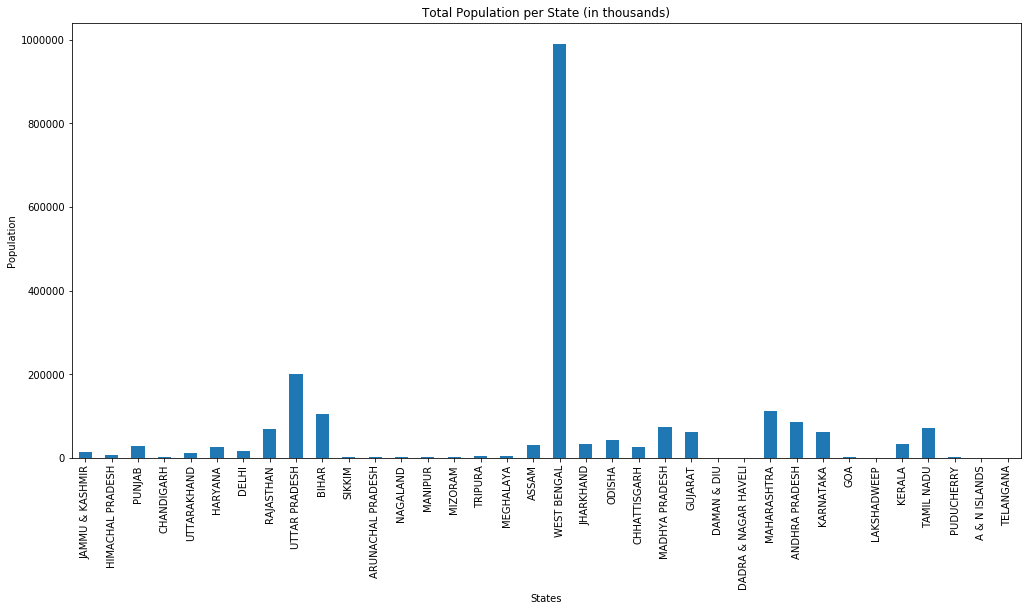

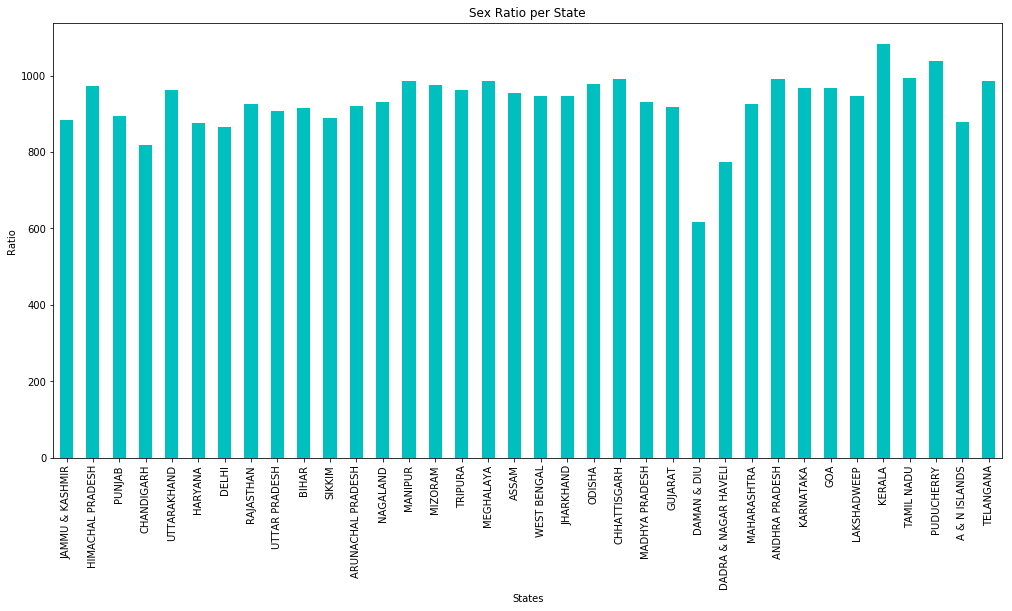

In [6]:
#importing the matplotlib module, that helps use plot graphs
import matplotlib.pyplot as plt

#Total Population Table
tot_pop_series = pd.Series.from_array(df.TOTPOPULAT)   
x_labels = df.STATNAME
# now to plot the figure...
plt.figure(figsize=(17, 8))
ax = tot_pop_series.plot(kind='bar')
ax.set_title("Total Population per State (in thousands)")
ax.set_xlabel("States")
ax.set_ylabel("Population")
ax.set_xticklabels(x_labels)
plt.show()

#Sex Ratio Table
sex_ratio_series = pd.Series.from_array(df.SEXRATIO)   
x_labels = df.STATNAME
# now to plot the figure...
plt.figure(figsize=(17, 8))
ax = sex_ratio_series.plot(kind='bar' , color='c')
ax.set_title("Sex Ratio per State")
ax.set_xlabel("States")
ax.set_ylabel("Ratio")
ax.set_xticklabels(x_labels)
plt.show()

The above graphs show the **Total Population (state-vice)** and **Sex Ratio (state-vice)**, with the number of states on the vertical scale 

## Plotting the youth
Here is a graph showing the potential candidates that could/are recieving proper education. These are kids ranging from age group 6-15.

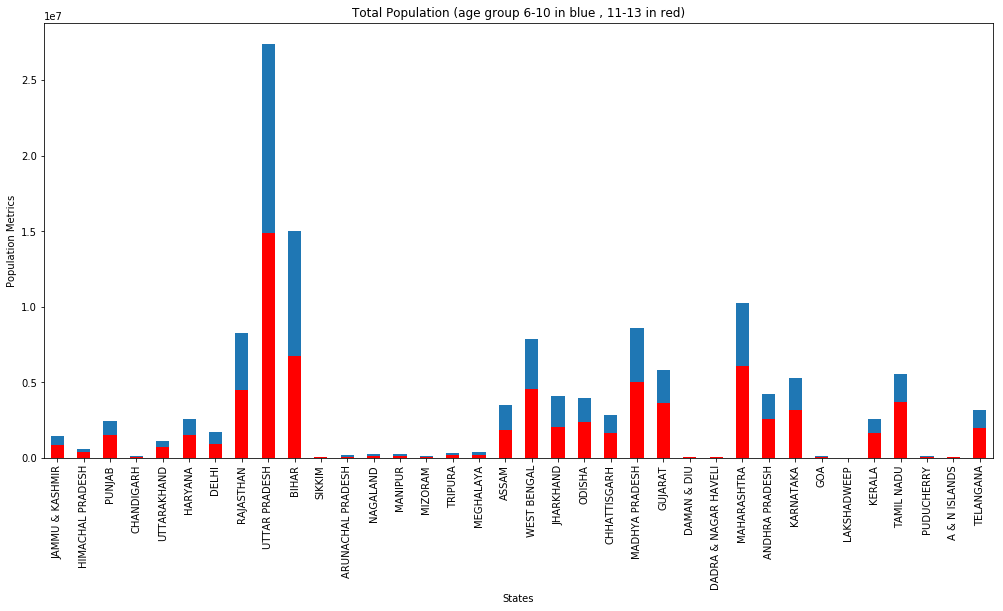

In [7]:
#Total Population, age group 6-10
tot_pop_series = pd.Series.from_array(df.TOT_6_10_15)   # in my original code I create a series and run on that, so for consistency I create a series from the list.
x_labels = df.STATNAME
# now to plot the figure...
plt.figure(figsize=(17, 8))
ax = tot_pop_series.plot(kind='bar')
#plotting the age group 13-15
tot_pop_series = pd.Series.from_array(df.TOT_11_13_15)   # in my original code I create a series and run on that, so for consistency I create a series from the list.
x_labels = df.STATNAME
tot_pop_series.plot(kind='bar' , ax=ax , color='r')

ax.set_title("Total Population (age group 6-10 in blue , 11-13 in red)")
ax.set_xlabel("States")
ax.set_ylabel("Population Metrics")
ax.set_xticklabels(x_labels)

plt.show()

In [8]:
#displaying highest enrollment per number of students
enroll_totalstudents = df.copy()
enroll_totalstudents = enroll_totalstudents[['STATNAME' , 'TOT_6_10_15' , 'TOT_11_13_15' , 'ENRTOT']]
enroll_totalstudents['TOT_6_10_15']+=enroll_totalstudents['TOT_11_13_15'] + (df['POPULATION_0_6'] * df['TOTPOPULAT'] * 10)
enroll_totalstudents = enroll_totalstudents.drop(['TOT_11_13_15'] , axis = 1)

#percentage of students who enroll in a school
enroll_totalstudents['PER_ENROLL'] = (enroll_totalstudents['ENRTOT']/enroll_totalstudents['TOT_6_10_15'])*100
print("The overall percentage enrollment per state : ")
enroll_totalstudents

The overall percentage enrollment per state : 


,STATNAME,TOT_6_10_15,ENRTOT,PER_ENROLL
0,JAMMU & KASHMIR,4327432.9,1856776,42.907101
1,HIMACHAL PRADESH,1706252.8,950766,55.722458
2,PUNJAB,6887292.8,3962439,57.532606
3,CHANDIGARH,300143.0,157921,52.615253
4,UTTARAKHAND,3140191.8,1712673,54.540395
5,HARYANA,7363825.3,3730944,50.665841
6,DELHI,4548887.8,3007010,66.104290
7,RAJASTHAN,23195819.1,12340135,53.199824
8,UTTAR PRADESH,72017612.0,36425633,50.578785
9,BIHAR,40329547.0,23431785,58.100789


## Plotting the enrollment/youth
*Youth means children from the age 6-13 in this case*

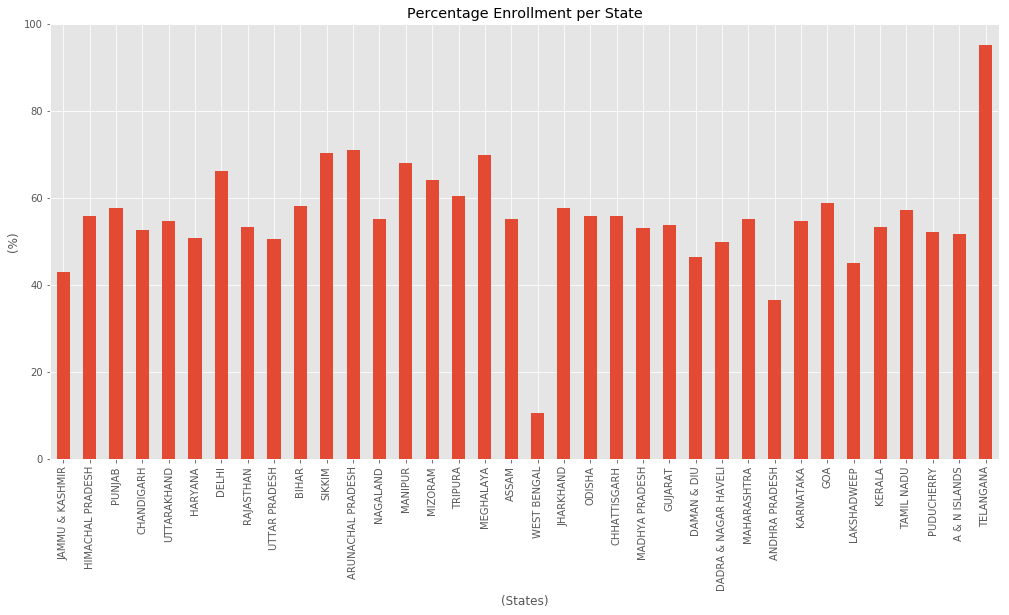

In [9]:
style.use('ggplot')
plt.figure(figsize=(17, 8))
ax = enroll_totalstudents['PER_ENROLL'].plot(kind='bar')
x_labels = df.STATNAME
ax.set_title("Percentage Enrollment per State")
ax.set_xlabel("(States)")
ax.set_ylabel("(%)")
ax.set_xticklabels(x_labels , rotation='vertical')
plt.show()

## Returning the states with the highest number of enrollment/youth
Below mentioned are the top ten states with the highest number of enrollment per youth percent.

In [10]:
enroll_totalstudents_highest = enroll_totalstudents.nlargest(10 , columns = ['PER_ENROLL'])
print("Top ten states with the highest percentage enrollment : ")
enroll_totalstudents_highest

Top ten states with the highest percentage enrollment : 


,STATNAME,TOT_6_10_15,ENRTOT,PER_ENROLL
35,TELANGANA,5256160.0,5005185,95.225126
11,ARUNACHAL PRADESH,455061.8,322458,70.860266
10,SIKKIM,149756.0,105297,70.312375
16,MEGHALAYA,1112190.0,775613,69.737455
13,MANIPUR,738309.6,502596,68.073881
6,DELHI,4548887.8,3007010,66.104290
14,MIZORAM,334850.7,214317,64.003749
15,TRIPURA,942363.0,569512,60.434461
29,GOA,333662.6,196309,58.834583
9,BIHAR,40329547.0,23431785,58.100789


## The percentage difference between properties of each state
This would tell us the extent of similarity between each of the top ten states with the highest enrollment percentages.

In [13]:
list_enroll_totalstudents_highest = [x for x in enroll_totalstudents_highest['STATNAME']]
df_enroll_totalstudents_highest = df.loc[df['STATNAME'].isin(list_enroll_totalstudents_highest)]
df_enroll_totalstudents_highest['PER_ENROLL'] = enroll_totalstudents_highest['PER_ENROLL']
df_enroll_totalstudents_highest_num = df_enroll_totalstudents_highest.drop(['STATNAME' , 'STATCD' , 'YEAR'] , axis=1) #the list containing only numeric data for calculation
#df_enroll_totalstudents_highest_num.loc[0] = df_enroll_totalstudents_highest_num.mean()
#df_enroll_totalstudents_highest_num_top = df_enroll_totalstudents_highest_num.iloc[[0]] #the topmost/highest amongst the highest enrolment/youth table
#display percentage changes amongst these states w.r.t their characters
df_enroll_totalstudents_highest_num_pct = df_enroll_totalstudents_highest_num.pct_change()
df_enroll_totalstudents_highest_num_pct

d:\python\python 3.6.1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,...,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7,PER_ENROLL
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3.222222,6.782609,32.954205,80.637681,5.196204,-0.891471,0.522109,0.196088,0.057737,-0.053571,...,23.466019,-0.921168,4.688665,110.381503,-0.968255,1.338462,-0.998487,4.870192,-0.960139,-0.121074
10,-0.894737,-0.945996,-0.981461,-0.980295,-0.994143,0.178230,-0.438547,-0.506980,-0.029476,-0.710692,...,-0.992857,-1.000000,-0.996656,-0.997405,-0.984802,-1.000000,-1.000000,-0.992629,-1.000000,0.210179
11,4.000000,2.413793,2.944444,1.108108,1.274671,0.673096,0.458706,1.097087,0.034871,-1.000000,...,5.277778,inf,2.673469,4.440000,1.200000,inf,NaN,5.333333,inf,0.007792
13,-0.550000,-0.646465,-0.187793,-0.038462,0.968185,0.283981,-0.114598,-0.280478,0.072826,inf,...,-0.548673,0.200000,-0.011111,-0.742647,-0.636364,-0.909091,NaN,-0.280702,-1.000000,-0.039322
14,-0.111111,0.028571,-0.648637,-0.248889,-0.599192,0.910208,0.168721,0.221448,-0.012158,-0.973684,...,-1.000000,-1.000000,1.123596,-0.085714,-1.000000,336.000000,NaN,-1.000000,NaN,-0.059790
15,0.000000,0.972222,0.293772,1.177515,2.364803,-0.632113,-0.202373,-0.352502,-0.014359,177.000000,...,inf,inf,1.015873,10.718750,inf,-1.000000,inf,inf,inf,-0.055767
16,0.375000,-0.422535,4.600363,0.654891,-0.192591,0.030262,0.549587,0.886102,0.026015,-0.966292,...,-0.996157,0.562500,0.606299,-0.933333,-0.971429,inf,-0.951613,-0.965251,1.133333,0.153935
29,-0.818182,-0.707317,-0.914045,-0.817734,-0.508097,2.002611,-0.489600,-0.706326,-0.018256,1.833333,...,42.800000,10.440000,-0.127451,2.200000,5.666667,-0.987085,5.666667,52.944444,18.062500,-0.156342
35,4.000000,37.250000,17.743396,15.000000,-0.758573,-0.159348,3.096134,0.662179,0.019628,8.058824,...,0.484018,22.080420,5.617041,14.918750,-0.960000,-1.000000,3.350000,-0.799176,4.640984,0.618523


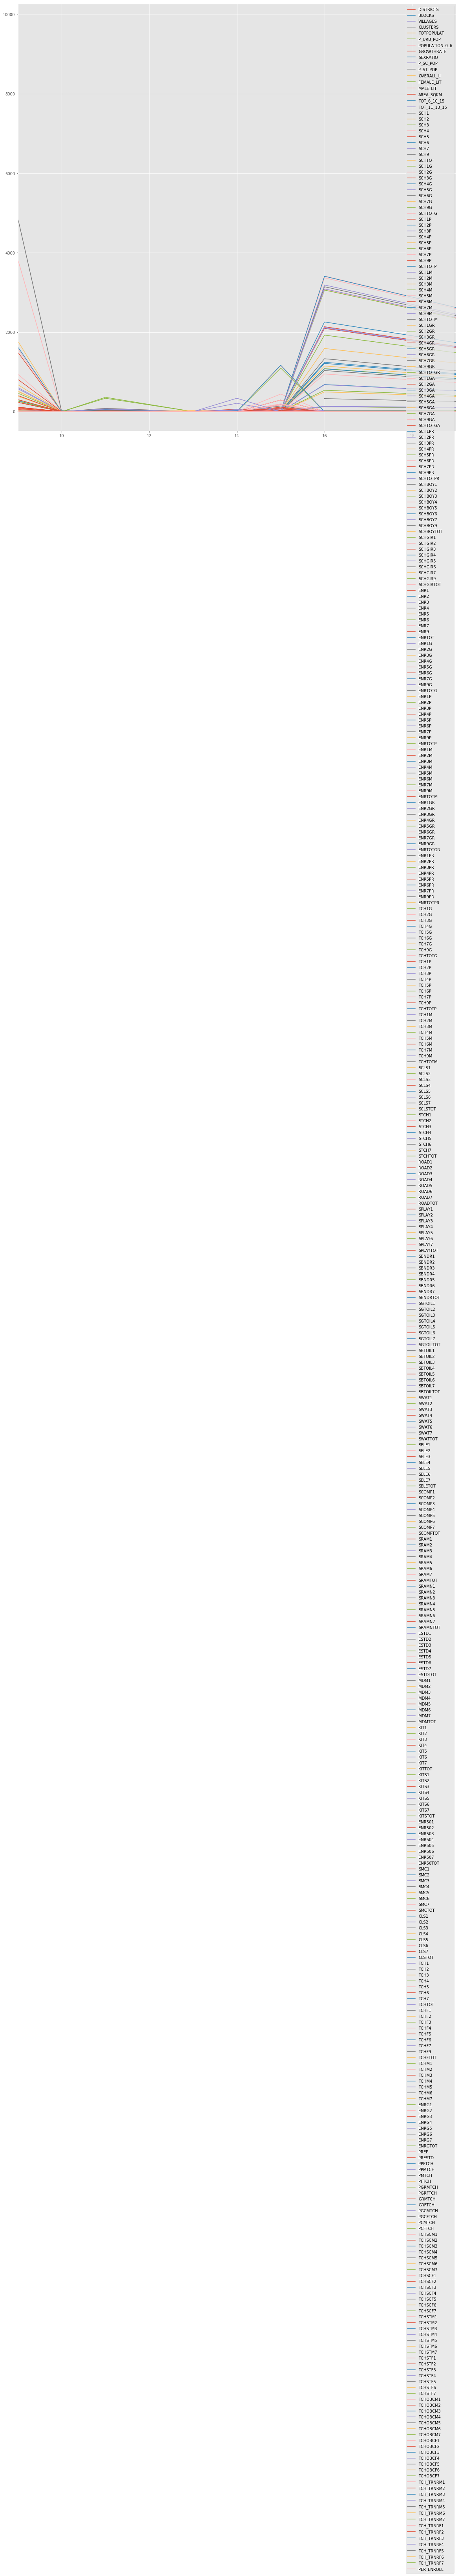

In [14]:
#style.use('ggplot')

plt.figure(figsize=(20, 8))
ax = df_enroll_totalstudents_highest_num.pct_change().plot(figsize=(20,20) , xlim=(9, 19))
plt.show()

## Plot of the variation in properties of top states with highest enrollment/youth
The above graph shows the variation between the properties/attributes of states with the highest enrollment/youth ratio. **This graph will help us understand the features that are common to all these top states**. By identifying these features, we can pin point what causes high enrolment/youth ratio in these states.

Clearly, we can see that there is a thin spectrum of lines (data) that merges together throughout the graph. This indicates that these attributes are common throughout the top states and are directly linked to the high enrolment rates in these states.

If we can pin point these datapoints, **we can also pin point exactly where the government should focus more on** to encourage more enrolments throughout other states too.

## Creating a table with the factors that are very common between top states, i.e, variation between these factors is less than 5%
Once we have this data, we can have a very closely resembling numerical output of exactly what the graph above was interpreting.

In [15]:
#now, creating a table with the factors that are VERY common to every state, i.e, variation between these factors is less than 5%
df_enroll_totalstudents_highest_factors = df_enroll_totalstudents_highest_num_pct.copy()
df_enroll_totalstudents_highest_factors = df_enroll_totalstudents_highest_num_pct.loc[:, df_enroll_totalstudents_highest_num.pct_change().std() < 5]
'''
for col in df_enroll_totalstudents_highest_factors:
    for elem in df_enroll_totalstudents_highest_factors[col][1:]:
        if not -2<elem<10:
            df_enroll_totalstudents_highest_factors = df_enroll_totalstudents_highest_factors.drop([col] , axis=1)
            break
'''
df_enroll_totalstudents_highest_factors

,DISTRICTS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,OVERALL_LI,FEMALE_LIT,MALE_LIT,TCH1P,...,SCOMP1,SRAM1,SRAMN1,TCHF1,TCHFTOT,PRESTD,PPFTCH,PFTCH,TCH_TRNRF1,PER_ENROLL
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3.222222,5.196204,-0.891471,0.522109,0.196088,0.057737,-0.260829,-0.341035,-0.193782,-0.473362,...,-0.533726,2.980779,3.742539,2.106172,0.634785,1.826022,-0.969161,-0.920233,4.688665,-0.121074
10,-0.894737,-0.994143,0.178230,-0.438547,-0.506980,-0.029476,0.287997,0.433152,0.189399,-0.571512,...,-0.746602,-0.991233,-0.986668,-0.964256,-0.949826,-0.970842,-0.536848,-0.333102,-0.996656,0.210179
11,4.000000,1.274671,0.673096,0.458706,1.097087,0.034871,-0.185523,-0.220594,-0.155802,-0.213026,...,-0.632184,3.898551,2.208000,0.015329,0.121768,0.926492,0.087969,0.147621,2.673469,0.007792
13,-0.550000,0.968185,0.283981,-0.114598,-0.280478,0.072826,0.192681,0.228303,0.173701,0.250000,...,-0.333333,2.263314,1.972569,1.534192,1.078030,0.956134,2.002378,1.642252,-0.011111,-0.039322
14,-0.111111,-0.599192,0.910208,0.168721,0.221448,-0.012158,0.146900,0.221812,0.083593,-0.028966,...,1.078125,-0.598368,-0.536913,-0.457859,-0.551638,-0.414154,-0.785743,-0.567010,1.123596,-0.059790
15,0.000000,2.364803,-0.632113,-0.202373,-0.352502,-0.014359,-0.041821,-0.069911,-0.016432,-0.166193,...,-0.127820,-0.431151,-0.364130,-0.076923,0.578464,-0.317927,0.467652,-0.311376,1.015873,-0.055767
16,0.375000,-0.192591,0.030262,0.549587,0.886102,0.026015,-0.139829,-0.112688,-0.162834,8.073254,...,1.853448,6.297619,5.823362,3.709734,0.783133,7.555492,3.437028,3.702267,0.606299,0.153935
29,-0.818182,-0.508097,2.002611,-0.489600,-0.706326,-0.018256,0.157923,0.109244,0.202669,-0.872512,...,-0.592145,-0.853181,-0.852610,-0.796818,-0.624572,-0.849269,0.811808,-0.458660,-0.127451,-0.156342
35,4.000000,-0.758573,-0.159348,3.096134,0.662179,0.019628,-0.239588,-0.292278,-0.192436,7.964654,...,13.725926,12.333333,14.439093,10.007318,11.548862,1.660353,7.815291,7.912013,5.617041,0.618523


## Listing in order the most matching characteristics amongst these states:
Below is a list in order with the most matching characteristics, that is, that property among these states that vary the least, or are close to zero %. Somehow, these are the factors that are common in all the states with the highest enrollments and thus play a major role in the encouraging factors for higher enrollments among these states.

In [16]:
mean_of_factors = df_enroll_totalstudents_highest_factors.mean(axis=0) #list of mean of all the data above
mean_of_factors = mean_of_factors.to_dict()
mean_of_factors_values = list(mean_of_factors.values())
mean_of_factors_values.sort() ; mean_of_factors_keys_sorted = [] ; mean_of_factors_sorted = {}
for value in mean_of_factors_values:
    for key in mean_of_factors.keys():
        if mean_of_factors[key] == value:
            mean_of_factors_keys_sorted.append(key)
            
#define a little function to make it easy to identify the key related to a value in a dictionary
def return_key(dic , val):
    for key in dic.keys():
        if dic[key] == val:
            return key
            break

#return the top matching characteristics inside a dictionary
mean_of_factors_keys_sorted

['OVERALL_LI',
 'MALE_LIT',
 'FEMALE_LIT',
 'SEXRATIO',
 'PER_ENROLL',
 'GROWTHRATE',
 'P_URB_POP',
 'POPULATION_0_6',
 'TOTPOPULAT',
 'DISTRICTS',
 'PRESTD',
 'PFTCH',
 'PPFTCH',
 'TCHFTOT',
 'TCHTOTP',
 'SCOMP1',
 'TCH1P',
 'TCH_TRNRF1',
 'TCHF1',
 'SRAM1',
 'SRAMN1',
 'SBNDR1']

## Summary of the above data
The above list shows the most common characteristics among the top states in terms of enrollment. **These, if implemented in other states too, should result in higher enollment rates**

**1)Female Literacy Rate : ** The top states in terms of high enrollment have the highest female literacy rates, which indicates if the female member of the family is literate, then there are higher chances of youth enrollment from that family.

**2)Overall / Male Literacy Rate : ** Again, an overall higher literacy rate is common among the states with highest enrollment percentages.

**3)Urban Population : ** These states have an overall higher urban population, which indicates youth from urban families contribute more to enrollment rates

**4)Growth Rate : ** The population growth rate in these states are relatively lower than the other ones. The government should implement steps to control growth rates in other states too, because this is a very significant commonality between these states.

**5)Total Population : ** As the total population graph suggests along with the table above, the population in these states is **very** low as compared to the other states. The government needs to spread more awareness about population control as it clearly is a major contributing factor with higher enrollment.

**6)Schools with attached pre-primary sections : ** These states have high number of pre-primary sections, indicating the government should create more pre-primary sections in schools over other states.

**7)Female Teachers in Schools : ** The schools in these states have higher number of female teachers. Moreover, the female teachers are qualified. The female teachers in government and private schools of these states are relatively high. This trend is very common among the states and thus, the government should take steps to ensure more qualified female teachers in schools.

**8)Higher Number of Primary Teacher : ** Schools in these states have higher number of primary teachers.

**9)Teachers with in-service Training : ** Schools in these states have teachers with in-service teaching. Hence, the government should take steps to provide in-service training to teachers in schools.

**10)School with Ramps : ** These schools have ramps wherever necessary. It certainly contributes to higher enrollments and hence, the government should build more ramps for ease of use for differently abled students.

**11)Schools with Boundaries : ** The schools in these states have boundaries around the perimeter. This trend is common among the top enrollment states. Hence, the government should implement plans to make boundaries around more schools in other states too.  Perhaps, a school with boundaries gives an impression of *completion*, and encourages students to join the school.

## Trying Regression Techniques
Below, results from various regression techniques have been applied. But, clearly, they are all inconsistent and not dependable. The reasons for this are illustrated below.

d:\python\python 3.6.1\lib\site-packages\scipy\stats\_stats_mstats_common.py:106: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
d:\python\python 3.6.1\lib\site-packages\scipy\stats\_stats_mstats_common.py:118: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


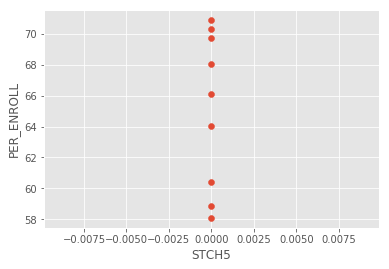

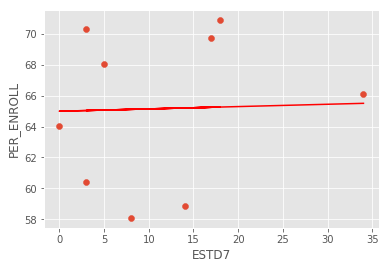

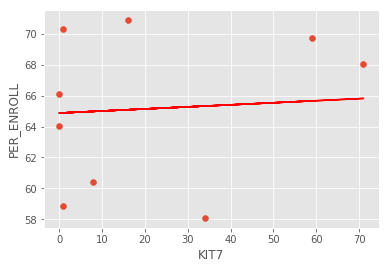

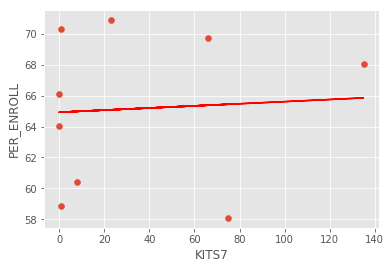

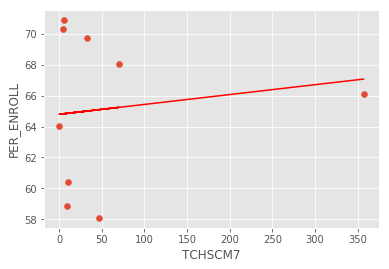

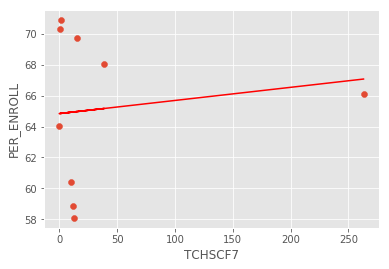

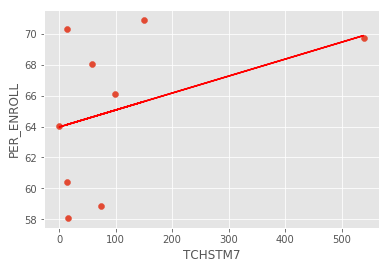

In [18]:
from scipy import stats
import numpy as np
from sklearn.metrics import r2_score

#we define a function to plot regression data between two properties
def plot_lin_regression_data(prop , fac): #prop is the property that is affected by the fac (factor)
    def predict(x):
        return slope*x + intercept
    fitline = predict(fac)
    plt.scatter(fac , prop)
    plt.plot(fac , fitline , c='r')
    plt.ylabel(prop.name)
    plt.xlabel(fac.name)
    plt.show()
    
df_enroll_totalstudents_highest_num['PER_ENROLL'] = enroll_totalstudents_highest['PER_ENROLL']
  
for col in df_enroll_totalstudents_highest_num.drop(['PER_ENROLL'] , axis=1):
    slope , intercept, r_value, p_value, std_err = stats.linregress(df_enroll_totalstudents_highest_num[col] , df_enroll_totalstudents_highest_num['PER_ENROLL'])
    if r_value**2 >= 0.80:
        plot_lin_regression_data(df_enroll_totalstudents_highest_num.drop([35])['PER_ENROLL'] , df_enroll_totalstudents_highest_num.drop([35])[col])

### In the above figure (and below), we have tried to plot a mathematical relation between enrollment percentage and all other characteristics of a state.
In the above example, we have used **Linear Regression** to plot a linear relation between various properties of a state and the enrollment percentage. This method is a very popular approach when trying to predict values using already existing data. But unfortunately in our case, this method fails. Simply because of the fact that, there can not be a linear relation between these properties. The decision of enrollment in a school lies far beyond than something as simple as, let's say, the number of ST category teachers in the school. Increasing number of ST category teachers does not always ensure an increase in enrollment.

## Polynomial Regression
Below is an example of **Polynomial Regression**

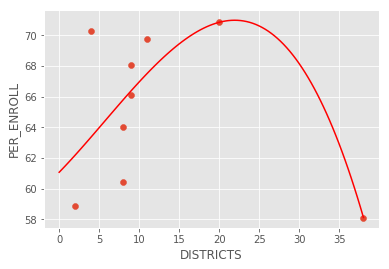

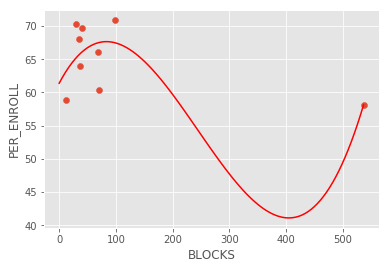

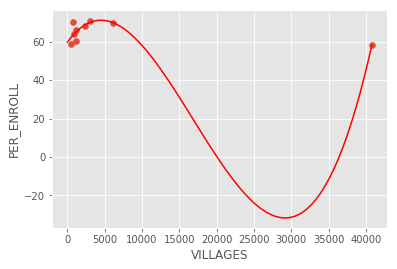

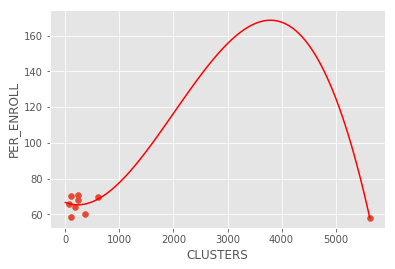

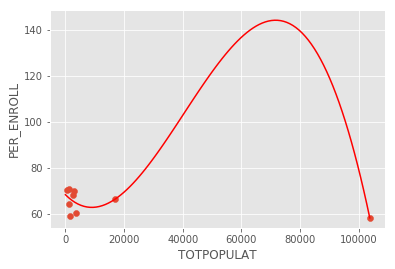

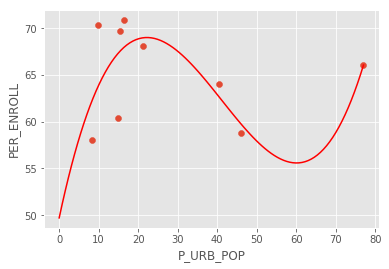

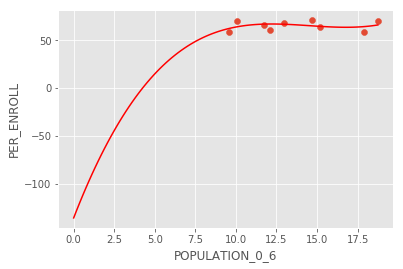

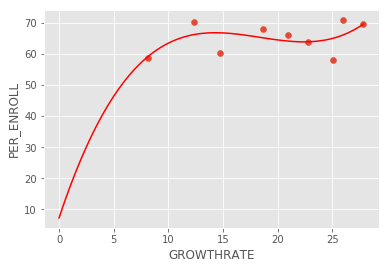

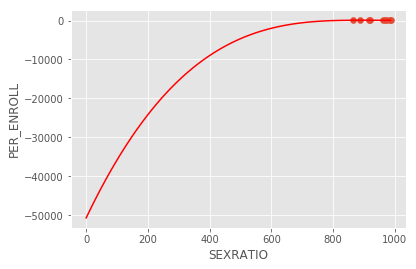

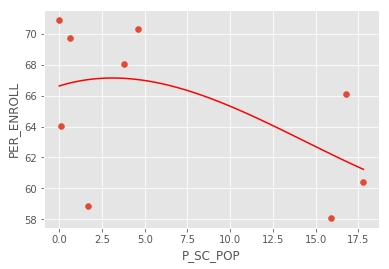

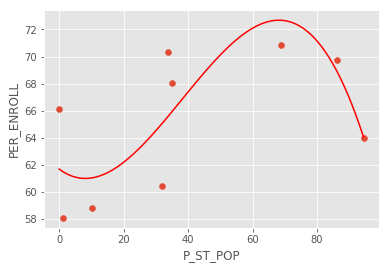

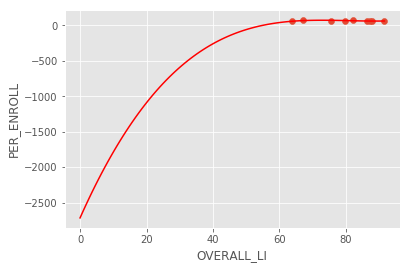

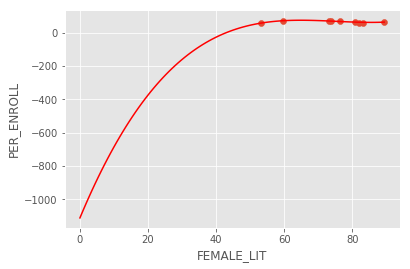

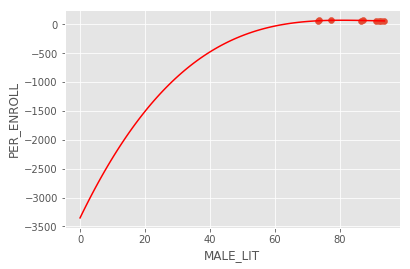

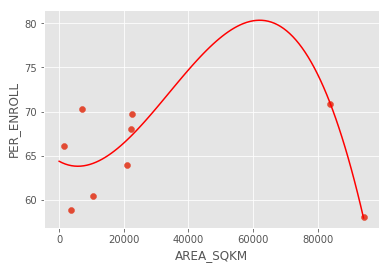

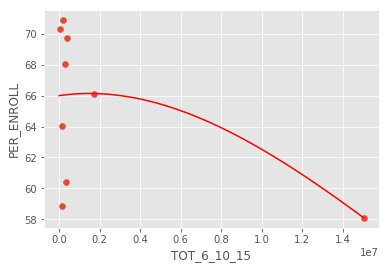

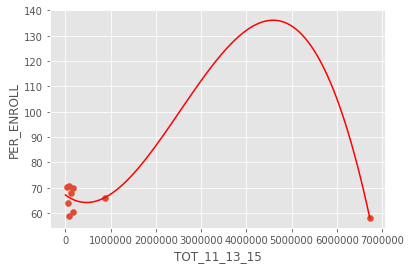

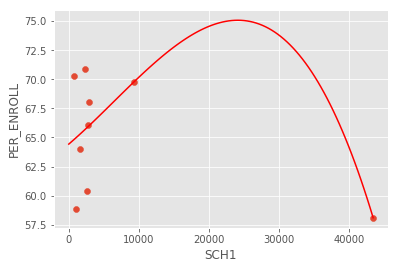

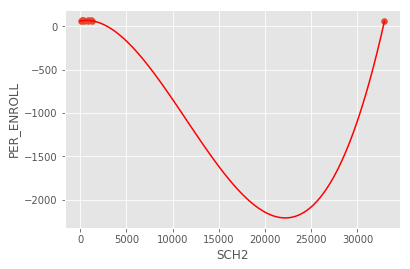

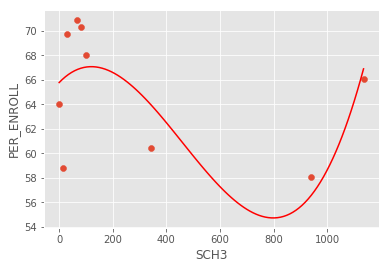

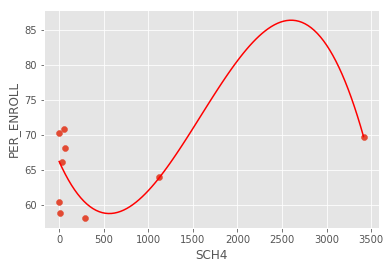

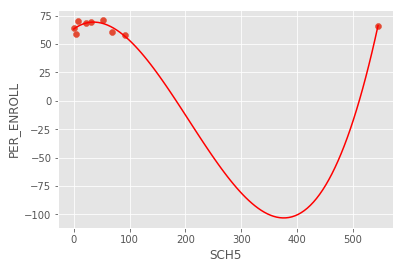

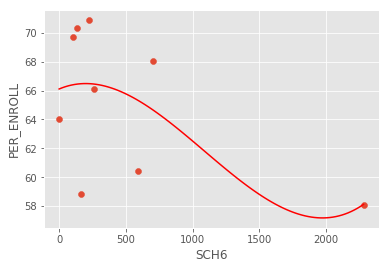

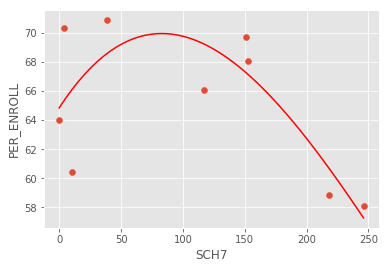

d:\python\python 3.6.1\lib\site-packages\numpy\lib\polynomial.py:584: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale
d:\python\python 3.6.1\lib\site-packages\numpy\lib\polynomial.py:586: RuntimeWarning: divide by zero encountered in true_divide
  c = (c.T/scale).T  # broadcast scale coefficients
d:\python\python 3.6.1\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
d:\python\python 3.6.1\lib\site-packages\numpy\lib\polynomial.py:680: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [19]:
def plot_pol_regression_data(prop , fac):
    x = np.array(fac)
    y = np.array(prop)
    p = np.poly1d(np.polyfit(x , y , 3))
    xp = np.linspace(0 , fac.max() , 100)
    r = r2_score(y , p(x))
    if r >- 0.8:
        plt.scatter(x , y)
        plt.plot(xp , p(xp) , c='r')
        plt.ylabel(prop.name)
        plt.xlabel(fac.name)
        plt.show()
        
for col in df_enroll_totalstudents_highest_num.drop(['PER_ENROLL'] , axis=1):
    plot_pol_regression_data(df_enroll_totalstudents_highest_num.drop([35])['PER_ENROLL'] , df_enroll_totalstudents_highest_num.drop([35])[col])

Above is an example of **Polynomial Regression**. With this method, we try to form a polynomial relation between enrollment percentage and other characteristics of state. Clearly, this method allows for much more flexibility and thus is more accurate at predicting enrollment percentages for new sets of data.

Taking some results from our previously applied algorithm,

1) Clearly the graphs of female literacy rate and urban population V/S enrollment percentages show rise in y-value as x-value is increased, i.e percentage enrollment increases as these properties increase too.

2) The graph of overall literacy rates and male literacy rates also support our obtained results.

## Multivariat Regression
This technique is extensively used in Data Sciences. Within the context of this problem, what this method does for us is to convert our enrollment percentage as a function of all other characteristics of the state. So basically,

y = f1(x1) + f2(x2) + f3(x3) + ...

Where f1, f2, f3... are functions of x. In this case, x means properties of a state. This equation in y will obviously have coefficients preceding every x term, and these coefficients are the measure of how much each property contribute to overall enrollment percentage. Higher the coefficient, higher the contribution. Below is a summarytable consisting coefficients of every single property after calculation.

In [20]:
import statsmodels.api as sm
from  sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df_without_enroll_pop_num = df.copy()
df_without_enroll_pop_num = df_without_enroll_pop_num.drop(['YEAR' , 'STATCD' , 'STATNAME'] , axis=1)
#remove other enrollment columns for now, we are only concerned with the total enrollment for now.
#removal list:
rem_list = ['ENR' , 'TOT' , 'GR' , 'PR' , 'EST' , 'ENR50' , 'POPULATION_0_6' , 'TOT_6_10_15' , 'TOT_11_13_15']
for word in rem_list:
    for col in df_without_enroll_pop_num:
        if word in str(col):
            df_without_enroll_pop_num = df_without_enroll_pop_num.drop([col] , axis=1)

#df_without_enroll_pop_num = df_without_enroll_pop_num.drop(['ENRTOT' , 'POPULATION_0_6' , 'TOT_6_10_15' , 'TOT_11_13_15'] , axis=1)
df_without_enroll_pop_num['PER_ENROLL'] = enroll_totalstudents['PER_ENROLL'] #defined before, contains enrollment percentages per state.
#Multivariate Regression
x_list = [str(x) for x in df_without_enroll_pop_num] #all columns except enrollment columns, because that is going to be on the y axis.
x = df_without_enroll_pop_num[x_list]
y = df_without_enroll_pop_num['PER_ENROLL']

x[x_list] = scale.fit_transform(x[x_list].as_matrix())

est = sm.OLS(y , x).fit()
est.summary()

d:\python\python 3.6.1\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
d:\python\python 3.6.1\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
d:\python\python 3.6.1\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
d:\python\python 3.6.1\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
d:\python\python 3.6.1\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PER_ENROLL   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                -33.299
Method:                 Least Squares   F-statistic:                  0.001417
Date:                Fri, 11 Aug 2017   Prob (F-statistic):               1.00
Time:                        20:01:23   Log-Likelihood:                -195.67
No. Observations:                  36   AIC:                             461.3
Df Residuals:                       1   BIC:                             516.8
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DISTRICTS      0.6190    403.566      0.002      0.999   -5127.169    5128.407
BLOCKS         0.4899     63.535      0.008      0.995    -806.796     807.776
VILLAGES       0.1200     45.661      0.003      0.998    -580.064     580.304
CLUSTERS      -0.1022     62.657     -0.002      0.999    -796.236     796.032
P_URB_POP     -0.0922    159.217     -0.001      1.000   -2023.131    2022.947
SEXRATIO       0.1714    116.861      0.001      0.999   -1484.693    1485.035
P_SC_POP       0.1851    321.130      0.001      1.000   -4080.160    4080.530
P_ST_POP      -0.0992    156.110     -0.001      1.000   -1983.669    1983.470
OVERALL_LI    -0.2383    107.009     -0.002      0.999   -1359.915    1359.439
FEMALE_LIT     0.4906    214.670      0.002      0.999   -2727.155    2728.136
MALE_LIT      -0.9218    164.363     -0.006      0.996   -2089.354    2087.510
AREA_SQKM      0.1368    148.419      0.001      0.999   -1885.711    1885.985
SCH1          -0.0728     19.085     -0.004      0.998    -242.571     242.425
SCH2          -0.1128     16.620     -0.007      0.996    -211.287     211.061
SCH3          -0.1520     15.575     -0.010      0.994    -198.050     197.746
SCH4          -0.0727     10.889     -0.007      0.996    -138.435     138.289
SCH5           0.0190     16.384      0.001      0.999    -208.158     208.196
SCH6           0.0268     11.375      0.002      0.998    -144.505     144.559
SCH7          -0.0154      7.338     -0.002      0.999     -93.259      93.229
SCH9        4.349e-16   2.31e-13      0.002      0.999   -2.94e-12    2.94e-12
SCH1G         -0.0394     15.586     -0.003      0.998    -198.072     197.993
SCH2G         -0.1783     29.646     -0.006      0.996    -376.870     376.513
SCH3G          0.0701     29.269      0.002      0.998    -371.824     371.965
SCH4G         -0.0596     21.428     -0.003      0.998    -272.329     272.210
SCH5G         -0.1689     51.413     -0.003      0.998    -653.430     653.092
SCH6G         -0.2735     42.217     -0.006      0.996    -536.696     536.149
SCH7G         -0.1298     39.307     -0.003      0.998    -499.570     499.310
SCH9G      -4.161e-17   6.89e-14     -0.001      1.000   -8.75e-13    8.75e-13
SCH1P         -0.2232     52.260     -0.004      0.997    -664.246     663.800
SCH2P          0.0025     65.069    3.9e-05      1.000    -826.778     826.784
SCH3P         -0.3780     51.912     -0.007      0.995    -659.981     659.225
SCH4P         -0.1112     40.136     -0.003      0.998    -510.087     509.865
SCH5P          0.1610     24.342      0.007      0.996    -309.130     309.452
SCH6P          0.2024     34.168      0.006      0.996    -433.945     434.349
SCH7P          0.0995     29.304      0.003      0.998    -372.237     372.436
SCH9P               0          0        nan        nan           0           0
SC

### Unfortunately though, this method does not work in our case too.
**Multivariat Regression gives authentic results only when each datapoint in the dataset is independant from one another**. But in our case, it is far from so. Most of the datapoints are heavily interconnected and mostly form some sort of a subset or intersection set with one another. Even after deleting some columns, this method did not give accurate results at all. In fact, running some prediction tests for information picked up from the table itself, it gives state enrollment percentages in the order of ten thousands, which is highly incorrect. Hence, the results of this method are highly innacurate and do not contribute to our needs.

In [21]:
est.predict(df_without_enroll_pop_num.iloc[35])

DISTRICTS     39068.400421
BLOCKS        39068.400421
VILLAGES      39068.400421
CLUSTERS      39068.400421
P_URB_POP     39068.400421
SEXRATIO      39068.400421
P_SC_POP      39068.400421
P_ST_POP      39068.400421
OVERALL_LI    39068.400421
FEMALE_LIT    39068.400421
MALE_LIT      39068.400421
AREA_SQKM     39068.400421
SCH1          39068.400421
SCH2          39068.400421
SCH3          39068.400421
SCH4          39068.400421
SCH5          39068.400421
SCH6          39068.400421
SCH7          39068.400421
SCH9          39068.400421
SCH1G         39068.400421
SCH2G         39068.400421
SCH3G         39068.400421
SCH4G         39068.400421
SCH5G         39068.400421
SCH6G         39068.400421
SCH7G         39068.400421
SCH9G         39068.400421
SCH1P         39068.400421
SCH2P         39068.400421
                  ...     
TCHSTF7       39068.400421
TCHOBCM1      39068.400421
TCHOBCM2      39068.400421
TCHOBCM3      39068.400421
TCHOBCM4      39068.400421
TCHOBCM5      39068.400421
T

# Measuring Dropouts 
For this, we are going to use the data from 2014 and 2015. We are then going to analyse how many dropped out of schools, and then get back a detailed analysis by pointing out the factors that are very common between states with high dropout rates. This way, we know tentatively what to focus on for higher and better enrollment rates.

In [47]:
df_2014 = pd.read_excel(edu_dir + 'All-India-2014.xlsx')
print("Summary of the 2014 UDISE Database : ")
df_2014.head()
#The 2014 table

Summary of the 2014 UDISE Database : 


,YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7
0,2014-15,1,JAMMU & KASHMIR,22,201,7262,1619,12549,20.05,16.01,...,25,684,325,818,1146,2,25,6,184,98
1,2014-15,2,HIMACHAL PRADESH,12,124,10121,2240,6857,8.69,11.14,...,2464,23,1270,5786,25,30,861,1311,33,622
2,2014-15,3,PUNJAB,22,144,13274,1757,27704,29.82,10.62,...,3702,36,4290,14776,37,141,4268,5913,101,5578
3,2014-15,4,CHANDIGARH,1,20,84,20,1055,76.66,11.18,...,0,93,0,15,31,81,0,0,246,0
4,2014-15,5,UTTARAKHAND,13,95,11983,995,10117,21.54,13.14,...,1043,7,880,7823,37,36,1908,326,20,314


In [23]:
df_change_2015 = df.copy()
for col in df_change_2015:
    if col not in ['YEAR' , 'STATCD' , 'STATNAME' , 'TCHFTOT']:
        try:
            df_change_2015[col] = ((df[col] - df_2014[col])/df_2014[col]) * 100
        except:
            print(col)
            df_2014[col]+=1
            df_change_2015[col] = ((df[col] - (df_2014[col]))/(df_2014[col])) * 100
df_change_2015.drop(['TCHFTOT'] , axis=1)
df_change_2015.head()

,YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7
0,2015-16,1,JAMMU & KASHMIR,0.0,0.000000,0.013770,0.555899,0.0,0.000000,0.0,...,-68.000000,-52.046784,-51.384615,-57.579462,-63.699825,-50.000000,20.000000,-66.666667,-41.304348,-55.102041
1,2015-16,2,HIMACHAL PRADESH,0.0,0.000000,-0.009880,0.133929,0.0,0.000000,0.0,...,-59.618506,-73.913043,-63.858268,-33.287245,-60.000000,-70.000000,-75.145180,-66.132723,-66.666667,-67.041801
2,2015-16,3,PUNJAB,0.0,1.388889,-0.580081,1.309050,0.0,0.000000,0.0,...,-40.167477,-63.888889,-29.067599,31.700054,129.729730,45.390071,-74.601687,-39.827499,-0.990099,-28.522768
3,2015-16,4,CHANDIGARH,0.0,0.000000,0.000000,0.000000,0.0,26.858857,0.0,...,NaN,17.204301,NaN,126.666667,90.322581,137.037037,NaN,NaN,24.796748,NaN
4,2015-16,5,UTTARAKHAND,0.0,0.000000,0.050071,0.000000,0.0,0.000000,0.0,...,4.314477,-100.000000,-33.068182,-2.530998,-21.621622,-11.111111,-45.020964,18.711656,-50.000000,-12.738854


## Plot of percentage enrollment change over the year.
The graph below shows a percentage change in enrollment data per state, and the negative percentage changes indicate the dropout percentage.

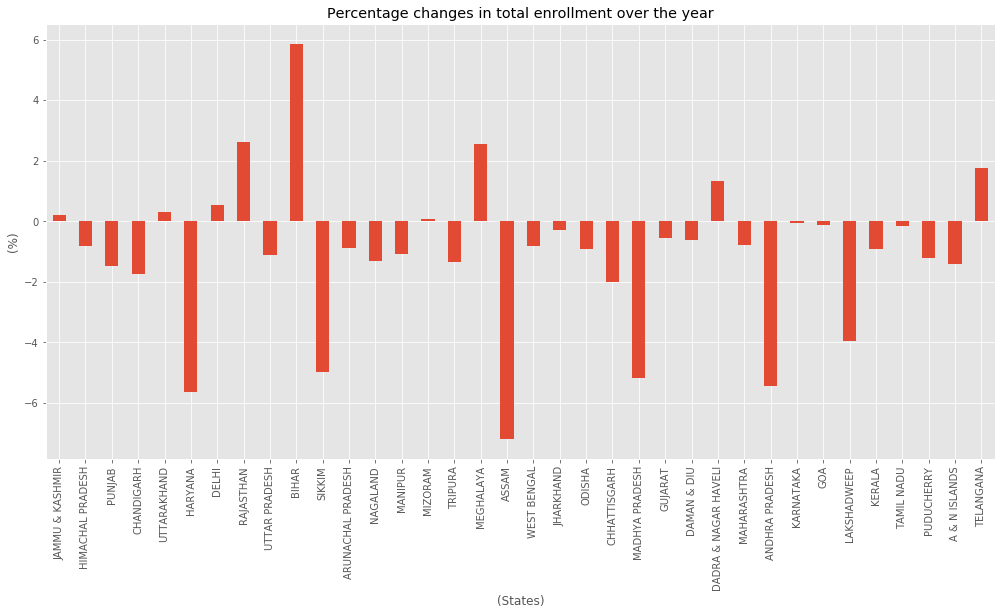

In [24]:
plt.figure(figsize=(17, 8))
ax = df_change_2015['ENRTOT'].plot(kind='bar')
x_labels = df_change_2015.STATNAME
ax.set_title("Percentage changes in total enrollment over the year")
ax.set_xlabel("(States)")
ax.set_ylabel("(%)")
ax.set_xticklabels(x_labels , rotation='vertical')
plt.show()

### List of dropout percentages : 
Below is a list of the states with positive dropout rates.

In [26]:
index = 0
for perc in df_change_2015['ENRTOT']:
    if(perc < 0):
        print(df_change_2015.loc[index]['STATNAME'] , '\t' , -perc)
    index += 1

HIMACHAL PRADESH 	 0.83078569484
PUNJAB 	 1.47056666051
CHANDIGARH 	 1.75559744437
HARYANA 	 5.64046327156
UTTAR PRADESH 	 1.12133917791
SIKKIM 	 4.97346761967
ARUNACHAL PRADESH 	 0.871521981721
NAGALAND 	 1.30224944258
MANIPUR 	 1.07468468043
TRIPURA 	 1.3345114039
ASSAM 	 7.19639490897
WEST BENGAL 	 0.814999062244
JHARKHAND 	 0.286219292504
ODISHA 	 0.914415649427
CHHATTISGARH 	 2.00772531811
MADHYA PRADESH 	 5.18794007229
GUJARAT 	 0.565898575776
DAMAN & DIU 	 0.635721135064
MAHARASHTRA 	 0.79554506143
ANDHRA PRADESH 	 5.44429458364
KARNATAKA 	 0.0644040534174
GOA 	 0.111434502972
LAKSHADWEEP 	 3.95537525355
KERALA 	 0.911216072648
TAMIL NADU 	 0.175899033198
PUDUCHERRY 	 1.22635020925
A & N ISLANDS 	 1.40476518386


## List of considerable dropout percentages (>2%)
We consider dropout rates to be significant if they are higher than 2%. This is the result after putting the required filter on the data : 

In [27]:
import math
index = 0
dropout_high = df.copy() #table to store data of high dropout states
for perc in df_change_2015['ENRTOT']:
    if(2<round(-perc)):
        pass
    else:
        dropout_high = dropout_high.drop([index])
    index += 1
dropout_high['ENRTOT'] = -df_change_2015['ENRTOT']
print("States with top dropout percentages : ")
dropout_high[['STATNAME' , 'ENRTOT']].nlargest(6 , columns = ['ENRTOT'])

States with top dropout percentages : 


,STATNAME,ENRTOT
17,ASSAM,7.196395
5,HARYANA,5.640463
27,ANDHRA PRADESH,5.444295
22,MADHYA PRADESH,5.187940
10,SIKKIM,4.973468
30,LAKSHADWEEP,3.955375


## Now we will apply the same logic to pinpoint reasons for these dropouts, as we did in case of enrollments.
We will find the similarities between these states, and the higher the similarity, the more probability it has of being an actual factor in the contribution of higher dropout rates.

In [28]:
dropout_high_num = dropout_high.copy()
dropout_high_num = dropout_high_num.drop(['STATNAME' , 'STATCD' , 'YEAR'] , axis = 1)
dropout_high_num_pct = dropout_high_num.pct_change()
dropout_high_num_pct #an ordered table containing percentage changes

,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,...,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,-0.809524,-0.769841,-0.898360,-0.927118,-0.976019,-0.591625,-0.227517,-0.378894,0.013683,-0.772277,...,-1.000000,0.636364,-1.000000,-0.915078,2.571429,-0.918033,-1.000000,-1.000000,-0.608696,-1.000000
17,5.750000,4.000000,27.879630,29.774775,50.264803,0.119797,0.439801,0.369741,0.073116,0.565217,...,inf,2.111111,inf,233.142857,11.180000,2.400000,inf,inf,4.444444,inf
22,0.888889,1.200000,1.508221,-0.068501,1.329173,0.993654,0.004147,0.199055,-0.025157,1.166667,...,-0.953125,-0.196429,-0.996540,-0.440774,-0.351396,3.647059,-0.478940,-0.915254,-0.061224,-1.000000
27,-0.745098,1.100313,-0.724718,0.595223,0.166230,0.117781,-0.297316,-0.453202,0.066667,0.051282,...,41.666667,6.333333,2670.000000,0.289589,6.301266,-0.772152,-1.000000,25.800000,4.521739,inf
30,-0.923077,-0.995522,-0.999337,-0.998227,-0.999244,0.703011,0.077375,-0.438739,-0.046371,-1.000000,...,-0.976562,-0.972727,-1.000000,-0.990694,-0.971221,0.611111,inf,-1.000000,-1.000000,-1.000000


## Plot of the state-wise characteristics
Below we plot a graph that shows various properties of the states (as in the UDISE Database). The properties that have large gaps between them have a higher probability of not being a significant contributor to the dropout rates. Hence, we ignore those, and focus on the properties which are very close together in the graph. In the figure below, these properties are the ones at the bottom with a difference of -2% to 10% between them, and thus are very common properties between these states. Hence, these properties have a higher probability of being a contributor to the dropout rates.

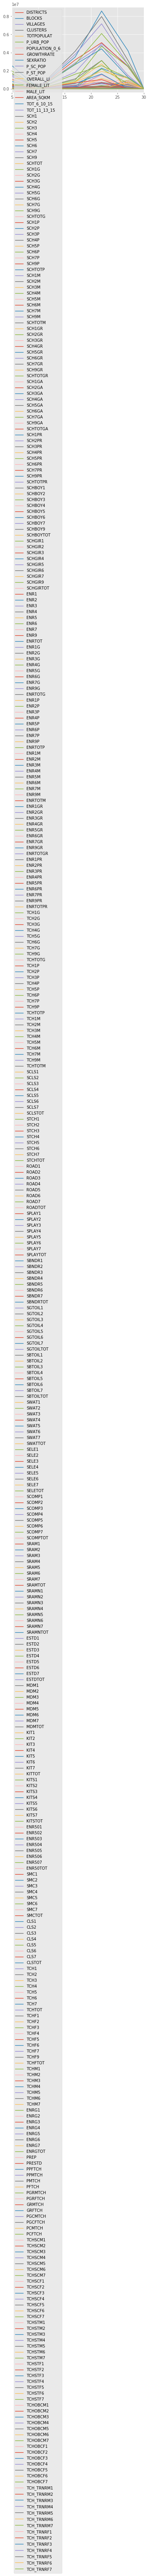

,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,SCH3G,SCH3GA,ENRTOT,ENR3G,TCH3G,SMC3
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,-0.591625,-0.227517,-0.378894,0.013683,-0.772277,0.072547,0.144676,0.022371,1.030303,-0.492647,-0.118252,-0.205150,1.442308,0.313725
17,0.119797,0.439801,0.369741,0.073116,0.565217,-0.109732,-0.119848,-0.097147,-0.044776,0.000000,0.446957,0.646506,-0.495036,-0.343284
22,0.993654,0.004147,0.199055,-0.025157,1.166667,-0.034846,-0.107775,0.021825,0.250000,1.318841,-0.279092,0.989605,0.267797,0.795455
27,0.117781,-0.297316,-0.453202,0.066667,0.051282,-0.042050,-0.004665,-0.061716,0.812500,-0.093750,0.049414,-0.203891,0.183422,0.278481
30,0.703011,0.077375,-0.438739,-0.046371,-1.000000,0.363878,0.477235,0.271969,-0.972414,-0.972414,-0.273483,-0.980251,-0.922729,-0.960396


In [30]:
dropout_high_num.plot()
plt.show()
#now, creating a table with the factors that are VERY common to every state, i.e, variation between these factors is less than 5%
dropout_high_num_pct = dropout_high_num_pct.loc[:, dropout_high_num_pct.std() < 1]
dropout_high_num_pct

### Above, we saw a graphical method of pointing out similarities. Below, we see a mathematical result of the factors that are actually very similar : 

In [31]:
#dropout_high_num
mean_of_factors = dropout_high_num_pct.mean(axis=0) #list of mean of all the data above
mean_of_factors = mean_of_factors.to_dict()
mean_of_factors_values = list(mean_of_factors.values())
mean_of_factors_values.sort() ; mean_of_factors_keys_sorted = [] ; mean_of_factors_sorted = {}
for value in mean_of_factors_values:
    for key in mean_of_factors.keys():
        if mean_of_factors[key] == value:
            mean_of_factors_keys_sorted.append(key)
            
#define a little function to make it easy to identify the key related to a value in a dictionary
def return_key(dic , val):
    for key in dic.keys():
        if dic[key] == val:
            return key
            break

#return the top matching characteristics inside a dictionary
mean_of_factors_keys_sorted

['GROWTHRATE',
 'SCH3GA',
 'ENRTOT',
 'POPULATION_0_6',
 'P_SC_POP',
 'SEXRATIO',
 'SMC3',
 'MALE_LIT',
 'ENR3G',
 'OVERALL_LI',
 'FEMALE_LIT',
 'TCH3G',
 'SCH3G',
 'P_URB_POP']

## Possible reasons for higher dropouts:

***Using the common properties above, we pinpoint what is most likely causing the higher dropout rates : *** 

**1) Low Number of Primary and Upper Primary Schools :** The government needs to build more primary and upper primary schools in these states, beacuse they are relatively lower than others in most cases.

**2) Higher SC population percentage : **These states have higher percentage of SC population. The government needs to promote education amongst the SC population to increase enrollments

**3) Lower schools with management comittee : **The schools with management committee are low in these states. The government needs to take steps for proper management committees in schools for better functioning overall.

**4) Low Female Literacy Rate : **The female literacy rate in these states are lower than other states. 
                                  "If you educate a woman,
                                  you educate a family" 
                                  So, the lower female literacy rates act as a barrier in positive enrollment rates.

**5) Low Overall/Male Literacy Rate : **The male, and in fact the overall literacy rate in these states are lower as compared to other states. The average family should be literate to know the importance of education, otherwise, they would never send their cildren for enrollment, or make their children dropout of schools.

**6) Low Number of Primary and Upper Primary Teachers (Government):** The number of primary and upper primary teachers (government) are low. The government needs to hire or take other steps to increase the number of primary and upper primary teachers in government schools.

**7) Low Urban Population : ** The urban population contributes very low percentage to the overall population. As seen in the case of **high enrollment states**, urban population contributes significantly to positive enrollment. The government needs to urbanize the states further, because joining school and earning a degree is a very significant part of the urban culture.

# This is it
This is the simple algorithm that I developed to analyse the data that was provided by the government. Due to the time constraints, I could not try other Machine Learning techniques, but I believe this method is able to provide accurate data with some minor modifications. Plus, this method is **very** expandable, and can be applied to any series of data with the specified conditions.